In [4]:
!pip install torch==2.0.0 -f https://download.pytorch.org/whl/cu111/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/cu111/torch_stable.html
  Using cached torch-2.0.0-cp310-cp310-manylinux1_x86_64.whl (619.9 MB)
  Attempting uninstall: torch
    Found existing installation: torch 2.0.1
    Uninstalling torch-2.0.1:
      Successfully uninstalled torch-2.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.15.2 requires torch==2.0.1, but you have torch 2.0.0 which is incompatible.


In [5]:
!pip uninstall -y torchaudio torchdata torchtext torchvision

Found existing installation: torchvision 0.15.2
Uninstalling torchvision-0.15.2:
  Successfully uninstalled torchvision-0.15.2


In [6]:
!pip install torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached torchvision-0.15.2-cp310-cp310-manylinux1_x86_64.whl (6.0 MB)
  Using cached torch-2.0.1-cp310-cp310-manylinux1_x86_64.whl (619.9 MB)
  Attempting uninstall: torch
    Found existing installation: torch 2.0.0
    Uninstalling torch-2.0.0:
      Successfully uninstalled torch-2.0.0


In [7]:
!pip install -qU transformers torch datasets gdcm pydicom pinecone-client

In [8]:
import os
import torch
import skimage
import requests
import numpy as np
import pandas as pd
from PIL import Image
from io import BytesIO
import IPython.display
import matplotlib.pyplot as plt
from datasets import load_dataset
from collections import OrderedDict
from transformers import CLIPProcessor, CLIPModel, CLIPTokenizer

In [82]:
# https://huggingface.co/datasets/conceptual_captions
image_data = load_dataset(
    "conceptual_captions", split="train",
    )

In [83]:
image_data_df = pd.DataFrame(image_data[:1000])

In [84]:
image_data_df.shape

(100, 2)

In [85]:
image_data_df.head()

,image_url,caption
0,http://lh6.ggpht.com/-IvRtNLNcG8o/TpFyrudaT6I/...,a very typical bus station
1,http://78.media.tumblr.com/3b133294bdc7c7784b7...,sierra looked stunning in this top and this sk...
2,https://media.gettyimages.com/photos/young-con...,young confused girl standing in front of a war...
3,https://thumb1.shutterstock.com/display_pic_wi...,interior design of modern living room with fir...
4,https://thumb1.shutterstock.com/display_pic_wi...,cybernetic scene isolated on white background .


In [86]:
"""
Not all the URLs are valid. This function returns True if the URL is valid. False otherwise. 
"""
from PIL import Image
def check_valid_URLs(image_URL):

    try:
      response = requests.get(image_URL)
      Image.open(BytesIO(response.content))
      return True
    except:
      return False

def get_image(image_URL):

    response = requests.get(image_URL)
    image = Image.open(BytesIO(response.content)).convert("RGB")

    return image

def get_image_caption(image_ID):

    return image_data[image_ID]["caption"]

In [87]:
# Transform dataframe
image_data_df["is_valid"] = image_data_df["image_url"].apply(check_valid_URLs)

In [88]:
image_data_df = image_data_df[image_data_df["is_valid"]==True]
image_data_df.head()

,image_url,caption,is_valid
0,http://lh6.ggpht.com/-IvRtNLNcG8o/TpFyrudaT6I/...,a very typical bus station,True
1,http://78.media.tumblr.com/3b133294bdc7c7784b7...,sierra looked stunning in this top and this sk...,True
2,https://media.gettyimages.com/photos/young-con...,young confused girl standing in front of a war...,True
3,https://thumb1.shutterstock.com/display_pic_wi...,interior design of modern living room with fir...,True
4,https://thumb1.shutterstock.com/display_pic_wi...,cybernetic scene isolated on white background .,True


In [89]:
image_data_df.shape

(84, 3)

In [90]:
image_data_df["image"] = image_data_df["image_url"].apply(get_image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


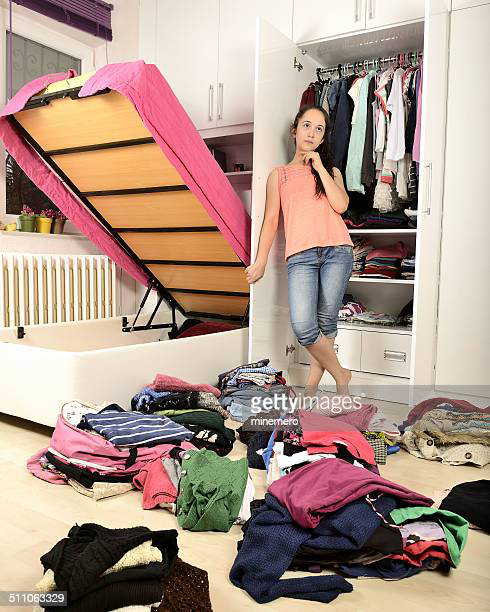

In [93]:
image_data_df.iloc[2]["image"]

In [94]:
image_data_df.iloc[2]["caption"]

'young confused girl standing in front of a wardrobe'

In [95]:
image_data_df.head()

,image_url,caption,is_valid,image
0,http://lh6.ggpht.com/-IvRtNLNcG8o/TpFyrudaT6I/...,a very typical bus station,True,<PIL.Image.Image image mode=RGB size=800x534 a...
1,http://78.media.tumblr.com/3b133294bdc7c7784b7...,sierra looked stunning in this top and this sk...,True,<PIL.Image.Image image mode=RGB size=500x441 a...
2,https://media.gettyimages.com/photos/young-con...,young confused girl standing in front of a war...,True,<PIL.Image.Image image mode=RGB size=490x612 a...
3,https://thumb1.shutterstock.com/display_pic_wi...,interior design of modern living room with fir...,True,<PIL.Image.Image image mode=RGB size=450x470 a...
4,https://thumb1.shutterstock.com/display_pic_wi...,cybernetic scene isolated on white background .,True,<PIL.Image.Image image mode=RGB size=450x470 a...


In [77]:
# """
# Not all the URLs are valid. This function returns True if the URL is valid. False otherwise. 
# """
# def check_valid_URLs(image_URL):

#     try:
#       response = requests.get(image_URL)
#       Image.open(BytesIO(response.content))
#       return True
#     except:
#       return False

# def get_image(image_URL):

#     response = requests.get(image_URL)
#     image = Image.open(BytesIO(response.content)).convert("RGB")

#     return image

# def get_image_caption(image_ID):

#     return image_data[image_ID]["caption"]

In [78]:
# Transform dataframe
# image_data_df["is_valid"] = image_data_df["image_url"].apply(check_valid_URLs)

In [79]:
# image_data_df = image_data_df[image_data_df["is_valid"]==True]
# image_data_df.head()

,image_url,caption,is_valid,image
0,http://lh6.ggpht.com/-IvRtNLNcG8o/TpFyrudaT6I/...,a very typical bus station,True,<PIL.Image.Image image mode=RGB size=800x534 a...
1,http://78.media.tumblr.com/3b133294bdc7c7784b7...,sierra looked stunning in this top and this sk...,True,<PIL.Image.Image image mode=RGB size=500x441 a...
2,https://media.gettyimages.com/photos/young-con...,young confused girl standing in front of a war...,True,<PIL.Image.Image image mode=RGB size=490x612 a...
3,https://thumb1.shutterstock.com/display_pic_wi...,interior design of modern living room with fir...,True,<PIL.Image.Image image mode=RGB size=450x470 a...
4,https://thumb1.shutterstock.com/display_pic_wi...,cybernetic scene isolated on white background .,True,<PIL.Image.Image image mode=RGB size=450x470 a...


In [80]:
# image_data_df.shape

(85, 4)

In [ ]:
# image_data_df["image"] = image_data_df["image_url"].apply(get_image)

In [21]:
# image_data_df["image_url"]

0     http://lh6.ggpht.com/-IvRtNLNcG8o/TpFyrudaT6I/...
1     http://78.media.tumblr.com/3b133294bdc7c7784b7...
2     https://media.gettyimages.com/photos/young-con...
3     https://thumb1.shutterstock.com/display_pic_wi...
4     https://thumb1.shutterstock.com/display_pic_wi...
                            ...                        
94    http://l7.alamy.com/zooms/476f507779b646c4b9ae...
95    https://i.pinimg.com/736x/83/ab/4f/83ab4fbbb6a...
96    https://i.pinimg.com/736x/58/2a/ec/582aecd2587...
98    https://ak8.picdn.net/shutterstock/videos/5281...
99    https://burpple-1.imgix.net/foods/2cb7a04812e4...
Name: image_url, Length: 85, dtype: object

In [96]:
# !pip install clip 
# !pip3 install clip-by-openai
!pip install openai-clip


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [97]:
import torch
import clip
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

# Define your custom dataset
class CustomDataset(Dataset):
    def __init__(self, image_paths, texts):
        self.image_paths = image_paths
        self.texts = texts
        self.transform = transforms.Compose([
            transforms.Resize(224),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        # response = requests.get(self.image_paths[idx])
        # image = Image.open(BytesIO(response.content)).convert("RGB")
        # image_path = self.image_paths[idx]
        text = self.texts[idx]
        # image = Image.open(image_path).convert("RGB")
        image = self.transform(image_paths[idx])
        return image, text


    # def load_image(self, image_path):
    #     if image_path.startswith("http"):
    #         response = requests.get(image_path)
    #         image = Image.open(BytesIO(response.content)).convert("RGB")
    #     else:
    #         image = Image.open(image_path).convert("RGB")
    #     return image


In [98]:
# Define your dataset paths and texts
image_paths = image_data_df["image"].tolist()
texts = image_data_df["caption"].tolist()

# Initialize and load the pre-trained CLIP model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

# Create an instance of your custom dataset
dataset = CustomDataset(image_paths, texts)

# Define training parameters
batch_size = 32
num_epochs = 10
learning_rate = 1e-5

# Create a data loader
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Set up optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = torch.nn.CosineEmbeddingLoss()

In [99]:
print(data_loader)

for images,texts in data_loader:
    print(images,texts)

tensor([[[[ 2.2489,  2.2489,  2.2489,  ...,  2.2489,  2.2489,  2.2489],
          [ 2.2489,  2.2489,  2.2489,  ...,  2.2489,  2.2489,  2.2489],
          [ 2.2489,  2.2489,  2.2489,  ...,  2.2489,  2.2489,  2.2489],
          ...,
          [ 2.2489,  2.2489,  2.2489,  ...,  2.2489,  2.2489,  2.2489],
          [ 2.2489,  2.2489,  2.2489,  ...,  2.2489,  2.2489,  2.2489],
          [ 2.2489,  2.2489,  2.2489,  ...,  2.2489,  2.2489,  2.2489]],

         [[ 0.9755,  0.9755,  0.9755,  ...,  0.9755,  0.9755,  1.0105],
          [ 0.9755,  0.9755,  0.9755,  ...,  0.9755,  0.9755,  1.0105],
          [ 0.9755,  0.9755,  0.9755,  ...,  0.9755,  0.9755,  1.0105],
          ...,
          [ 0.9755,  0.9755,  0.9755,  ...,  0.9755,  0.9755,  1.0105],
          [ 0.9755,  0.9755,  0.9755,  ...,  0.9755,  0.9755,  1.0105],
          [ 0.9755,  0.9755,  0.9755,  ...,  0.9755,  0.9755,  1.0105]],

         [[ 1.6465,  1.6465,  1.6465,  ...,  1.6465,  1.6465,  1.6640],
          [ 1.6465,  1.6465,  

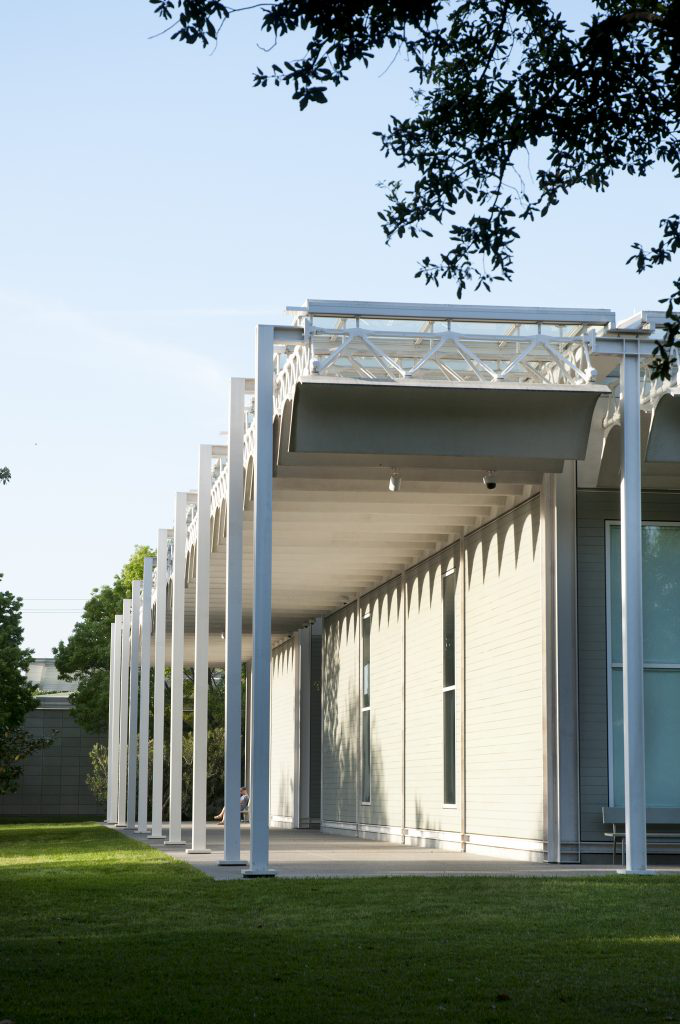

In [100]:
import requests
from PIL import Image
from io import BytesIO

# URL of the image
url = "https://www.papercitymag.com/wp-content/uploads/2017/06/Menil-40-680x1024.jpg"

# Download the image data
response = requests.get(url)

# Check if the download was successful
if response.status_code != 200:
    raise ValueError(f"Failed to download image from {url}. Status code: {response.status_code}")

# Get the image data
image_data = response.content

# Verify the image data
if len(image_data) == 0:
    raise ValueError("Empty image data received from the URL.")

# Open the image from the downloaded data
try:
    image = Image.open(BytesIO(image_data))
    # Perform operations on the image
    width, height = image.size
    image.show()
    # Close the image
    image.close()
except (OSError, IOError):
    # Handle the "cannot identify image file" error
    print(f"Error: Unable to open the image from URL: {url}")
except Exception as e:
    print(f"Error opening the image from URL: {url}")
    print(e)

In [74]:
!pip install gdcm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [75]:
# import torch
# import clip
# import torchvision.transforms as transforms
# from torch.utils.data import Dataset, DataLoader
# from PIL import Image
# import requests
# from io import BytesIO

# # Define your custom dataset
# class CustomDataset(Dataset):
#     def __init__(self, image_paths, texts):
#         self.image_paths = image_paths
#         self.texts = texts
#         self.transform = transforms.Compose([
#             transforms.Resize(224),
#             transforms.CenterCrop(224),
#             transforms.ToTensor(),
#             transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
#         ])

#     def __len__(self):
#         return len(self.image_paths)

#     def __getitem__(self, idx):
#         image_path = self.image_paths[idx]
#         text = self.texts[idx]

#         try:
#             response = requests.get(image_path)
#             image = Image.open(BytesIO(response.content)).convert("RGB")
#             # image = Image.open(image_path).convert("RGB")
#             image = self.transform(image)
#         except Exception as e:
#             print(f"Error loading image at path: {image_path}")
#             print(e)
#             # You can choose to skip this particular image or handle the error in another way
#             return None, None

#         return image, text


# # Define your dataset paths and texts
# image_paths = image_data_df["image_url"].tolist()
# texts = image_data_df["caption"].tolist()

# # Initialize and load the pre-trained CLIP model
# device = "cuda" if torch.cuda.is_available() else "cpu"
# model, preprocess = clip.load("ViT-B/32", device=device)

# # Create an instance of your custom dataset
# dataset = CustomDataset(image_paths, texts)

# # Remove any None values returned from the dataset
# dataset = [data for data in dataset if data[0] is not None]
# if len(dataset) == 0:
#     raise ValueError("No valid images found in the dataset.")

# # Define training parameters
# batch_size = 32
# num_epochs = 10
# learning_rate = 1e-5

# # Create a data loader
# data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# # Set up optimizer and loss function
# optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
# criterion = torch.nn.CosineEmbeddingLoss()

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Error loading image at path: https://www.papercitymag.com/wp-content/uploads/2017/06/Menil-40-680x1024.jpg
cannot identify image file <_io.BytesIO object at 0x7f0e20380b80>


In [102]:
# Fine-tune the CLIP model
model.train()
for epoch in range(num_epochs):
    for images, texts in data_loader:
        optimizer.zero_grad()
        # Encode images and texts
        images = images.to(device)
        texts = clip.tokenize(texts).to(device)
        image_features = model.encode_image(images)
        text_features = model.encode_text(texts)

        # Compute the loss
        loss = criterion(image_features, text_features, torch.ones(images.shape[0]).to(device))

        # Backpropagation and optimization
        loss.backward()
        optimizer.step()  

    # Print epoch loss
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}")

# Save the fine-tuned model
torch.save(model.state_dict(), "path/to/fine_tuned_model.pt")


Epoch [1/10], Loss: 0.6747755408287048


KeyboardInterrupt: ignored